In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
os.chdir("C:\\Users\\Admin\\Desktop\\Training\\PGAA001\\LogReg")

In [3]:
os.listdir()  # CSV , .sas7bdat- SAS data set

['bankloan.sas7bdat',
 'cust_new.csv',
 'Data.csv',
 'Logistic-Copy1.html',
 'Logistic-Copy1.ipynb']

In [4]:
df=pd.read_sas("bankloan.sas7bdat", encoding='iso-8859-1')

In [5]:
df  

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [6]:
df.to_csv("Data.csv", index=False)

In [7]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [8]:
d=df.default.value_counts(dropna=False)

In [9]:
d

0.0    517
1.0    183
NaN    150
Name: default, dtype: int64

In [10]:
d[0]/(d[0]+d[1]) # 73% non fraud , 27% Fraud 

0.7385714285714285

In [11]:
df["default"].isnull().sum() # count of missing where there is no 

150

In [12]:
df_new_customer=df[df.default.isnull()]

In [13]:
df_new_customer.to_csv("cust_new.csv")

In [14]:
df_new_customer

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,NaN
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,NaN
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,NaN
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,NaN
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [15]:
data=df[df.default.notnull()]  # Historical data for training 

In [16]:
data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36.0,2.0,6.0,15.0,27.0,4.6,0.262062,0.979938,1.0
696,29.0,2.0,6.0,4.0,21.0,11.5,0.369495,2.045505,0.0
697,33.0,1.0,15.0,3.0,32.0,7.6,0.491264,1.940736,0.0
698,45.0,1.0,19.0,22.0,77.0,8.4,2.302608,4.165392,0.0


In [17]:
#Univariate , bivariate , Multivariate --- You

In [18]:
y=data["default"]

In [19]:
x=data.drop(columns=["default"])

In [20]:
x.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)  # Model train 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
logisticRegr.score(x_train, y_train)

0.8

In [25]:
logisticRegr.score(x_test, y_test)  # accuracy

0.8571428571428571

In [22]:
x_train.shape 

(525, 8)

In [26]:
logisticRegr.predict(x_train)  # by default cut off of p >=0.5  ( if p >=0.5, 1 ,0)

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [37]:
pd.DataFrame(logisticRegr.predict_proba(x_train)[:,1], columns=["Prob_1"])

,Prob_1
0,0.072658
1,0.044470
2,0.010625
3,0.023667
4,0.711152
...,...
520,0.683588
521,0.125353
522,0.006138
523,0.446496


In [33]:
pd.DataFrame(logisticRegr.predict_proba(x_train)[:,1], columns=["Predicted_Prob"])

,Predicted_Prob
0,0.072658
1,0.044470
2,0.010625
3,0.023667
4,0.711152
...,...
520,0.683588
521,0.125353
522,0.006138
523,0.446496


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [32]:
y_predicted_train=logisticRegr.predict(x_train) # Its predicting 1 or 0

In [33]:
y_predicted_test=logisticRegr.predict(x_test) # Its predicting 1 or 0

In [38]:
print(classification_report(y_train, y_predicted_train))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       385
         1.0       0.67      0.49      0.56       140

    accuracy                           0.80       525
   macro avg       0.75      0.70      0.72       525
weighted avg       0.79      0.80      0.79       525



In [39]:
print(classification_report(y_test, y_predicted_test))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       132
         1.0       0.78      0.58      0.67        43

    accuracy                           0.86       175
   macro avg       0.83      0.76      0.79       175
weighted avg       0.85      0.86      0.85       175



In [29]:
import warnings 
warnings.filterwarnings('ignore')

In [30]:
#Use score method to get accuracy of model
# score = logisticRegr.score(x_train, y_train)
# print(score)

In [42]:
cm = metrics.confusion_matrix(y_train, y_predicted_train) # metrics.confusion_matrix(Actual, predicted)
print(cm)

[[352  33]
 [ 72  68]]


In [40]:
cmtest = metrics.confusion_matrix(y_test, y_predicted_test) # metrics.confusion_matrix(Actual, predicted)
print(cmtest)

[[125   7]
 [ 18  25]]


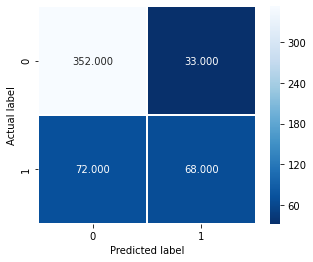

In [43]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
# plt.title(all_sample_title, size = 15);

In [44]:
x_train1=x_train.copy()
x_test1=x_test.copy()

In [45]:
x_train1["Default"]=y_train

In [46]:
x_train1["Prob_default"]=logisticRegr.predict_proba(x_train)[:,1]


In [47]:
x_train1["Pred_default"]=y_predicted_train

In [48]:
x_test1["Default"]=y_test
x_test1["Prob_default"]=logisticRegr.predict_proba(x_test)[:,1]
x_test1["Pred_default"]=y_predicted_test

In [49]:
x_train1.to_excel("x_train1.xlsx")
x_test1.to_excel("x_test1.xlsx")

In [50]:
def profile_decile(X,y, trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred=trained_model.predict(X_1)
    X_1["Prob_event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred
    X_1["Rank"]=pd.qcut(X_1["Prob_event"],10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    profile=pd.DataFrame(X_1.groupby("Decile")\
                        .apply(lambda x: pd.Series({
        "min_score": x["Prob_event"].min(),
        "max_score": x["Prob_event"].max(),
        "Bad":x["Y_actual"].sum(),
        "Good":x["Y_actual"].count()-x["Y_actual"].sum(),
        "Total":x["Y_actual"].count() })))
    return profile

In [51]:
profile_train=profile_decile(x_train, y_train, logisticRegr)

In [52]:
profile_train

,min_score,max_score,Bad,Good,Total
Decile,,,,,
1,0.635597,0.999153,42.0,11.0,53.0
2,0.487316,0.635544,28.0,24.0,52.0
3,0.385353,0.486043,21.0,32.0,53.0
4,0.288781,0.385267,23.0,29.0,52.0
5,0.197635,0.285965,10.0,42.0,52.0
6,0.133678,0.196512,5.0,48.0,53.0
7,0.074889,0.132866,6.0,46.0,52.0
8,0.035296,0.074519,4.0,49.0,53.0
9,0.010625,0.033626,1.0,51.0,52.0


In [55]:
profile_train.to_csv("profile_train.csv")

In [56]:
profile_test=profile_decile(x_test, y_test, logisticRegr)
profile_test.to_csv("profile_test.csv")

In [58]:
probs=logisticRegr.predict_proba(x_train)[:,1]

In [61]:
len(thresholds)

158

No handles with labels found to put in legend.


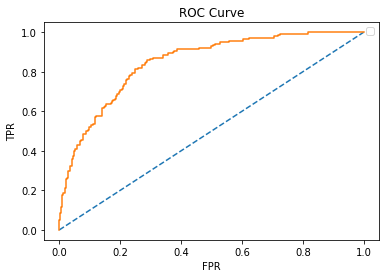

In [59]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [ ]:
Reciver Operative Charactoristics  

In [62]:
from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_train, probs)
AUC

0.8471799628942487

In [39]:
#An AUC score is a measure of the likelihood that the model that produced the
#predictions will rank a randomly chosen positive example above a randomly chosen negative example.
#Specifically, that the probability will be higher for a real event (class=1) than a real non-event 
#(class=0).
#Naive Prediction. A naive prediction under ROC AUC is any constant probability. 
#If the same probability is predicted for every example, there is no discrimination between positive
#and negative cases, therefore the model has no skill (AUC=0.5).

#Insensitivity to Class Imbalance. ROC AUC is a summary on the models ability to correctly 
#discriminate a single example across different thresholds. As such, it is unconcerned with the
#base likelihood of each class.

In [ ]:
#p value, Accuracy, Recall, Precision, ks Values , F1 score, Confusion matrix,ROC, AUC

In [63]:
from joblib import dump 
from joblib import load

In [64]:
dump(logisticRegr, "LogisticReg.joblib")

['LogisticReg.joblib']

In [65]:
log=load("LogisticReg.joblib")

In [69]:
new=pd.read_excel("new.xlsx")

In [70]:
log.predict_proba(new)[:,1] # 0.288

array([0.59583266, 0.17607485])

In [71]:
df_new_customer=pd.read_csv("cust_new.csv")

In [72]:
df_new_customer.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'],
      dtype='object')

In [73]:
new_cust=df_new_customer.copy()

In [74]:
new_cust["Prob_default"]=logisticRegr.predict_proba(df_new_customer)[:,1]

In [75]:
new_cust["New_Default"]=np.where(new_cust["Prob_default"]>=0.288780649066183,1,0)

In [76]:
new_cust.New_Default.value_counts()

0    98
1    52
Name: New_Default, dtype: int64

In [62]:
logisticRegr.get_params()  # Parameters which can help us to get better ans fast results 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:

from sklearn.linear_model import LogisticRegression
log_pe = LogisticRegression(C=2, penalty="l2")  # C = 1/ Lambda
log_pe.fit(x_train, y_train)
print( " Score train : ", log_pe.score(x_train, y_train))
print( " Score test : ", log_pe.score(x_test, y_test))
print("non Zero Weights/ var", np.count_nonzero(log_pe.coef_))

 Score train :  0.8
 Score test :  0.8514285714285714
non Zero Weights/ var 8


In [69]:
for i in [0.01,0.1,1,2,5,10,20,50,100,200]:
    log_pe = LogisticRegression(C=i, penalty="l2")  # C = 1/ Lambda
    log_pe.fit(x_train, y_train)
    
    print( " Value of C is " , i )
    print( "  Score train : ",  log_pe.score(x_train, y_train))
    print( " Score test : ", log_pe.score(x_test, y_test))
    print("non Zero Weights/ var", np.count_nonzero(log_pe.coef_))
    print( "-------------------------------------")
    

 Value of C is  0.01
  Score train :  0.7961904761904762
 Score test :  0.8457142857142858
non Zero Weights/ var 8
-------------------------------------
 Value of C is  0.1
  Score train :  0.7980952380952381
 Score test :  0.8514285714285714
non Zero Weights/ var 8
-------------------------------------
 Value of C is  1
  Score train :  0.8
 Score test :  0.8571428571428571
non Zero Weights/ var 8
-------------------------------------
 Value of C is  2
  Score train :  0.8
 Score test :  0.8514285714285714
non Zero Weights/ var 8
-------------------------------------
 Value of C is  5
  Score train :  0.7980952380952381
 Score test :  0.8571428571428571
non Zero Weights/ var 8
-------------------------------------
 Value of C is  10
  Score train :  0.7980952380952381
 Score test :  0.8571428571428571
non Zero Weights/ var 8
-------------------------------------
 Value of C is  20
  Score train :  0.7980952380952381
 Score test :  0.8571428571428571
non Zero Weights/ var 8
-----------

In [71]:
for i in [0.01,0.1,1,2,5,10,20,50,100,200]:
    log_pe = LogisticRegression(C=i, penalty="l1")  # C = 1/ Lambda
    log_pe.fit(x_train, y_train)
    
    print( " Value of C is " , i )
    print( "  Score train : ",  log_pe.score(x_train, y_train))
    print( " Score test : ", log_pe.score(x_test, y_test))
    print("non Zero Weights/ var", np.count_nonzero(log_pe.coef_))
    print( "-------------------------------------")

 Value of C is  0.01
  Score train :  0.7771428571428571
 Score test :  0.8057142857142857
non Zero Weights/ var 5
-------------------------------------
 Value of C is  0.1
  Score train :  0.8038095238095239
 Score test :  0.8571428571428571
non Zero Weights/ var 7
-------------------------------------
 Value of C is  1
  Score train :  0.8
 Score test :  0.8571428571428571
non Zero Weights/ var 7
-------------------------------------
 Value of C is  2
  Score train :  0.7980952380952381
 Score test :  0.8571428571428571
non Zero Weights/ var 8
-------------------------------------
 Value of C is  5
  Score train :  0.7980952380952381
 Score test :  0.8571428571428571
non Zero Weights/ var 8
-------------------------------------
 Value of C is  10
  Score train :  0.7980952380952381
 Score test :  0.8571428571428571
non Zero Weights/ var 8
-------------------------------------
 Value of C is  20
  Score train :  0.7980952380952381
 Score test :  0.8571428571428571
non Zero Weights/ va

In [72]:
log_pe.coef_

array([[ 0.03268243,  0.03918493, -0.25906754, -0.09329361, -0.00554865,
         0.05619814,  0.55832946,  0.08423051]])

In [73]:
log_pe = LogisticRegression(C=0.01, penalty="l1")  # C = 1/ Lambda
log_pe.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
log_pe.coef_

array([[-0.03988249,  0.        , -0.10751549, -0.00698621,  0.00753833,
         0.08311477,  0.        ,  0.        ]])

In [76]:
for l in ["l1", "l2"]:
    for i in [0.01,0.1,1,2,5,10,20,50,100,200]:
        log_pe = LogisticRegression(C=i, penalty=l)  # C = 1/ Lambda
        log_pe.fit(x_train, y_train)
        print("Train Score {} , test Score {} at C= {} and Penalty = {}".format(
            round(log_pe.score(x_train, y_train),3),round(log_pe.score(x_test, y_test), 3), i, l ))

Train Score 0.777 , test Score 0.806 at C= 0.01 and Penalty = l1
Train Score 0.804 , test Score 0.857 at C= 0.1 and Penalty = l1
Train Score 0.8 , test Score 0.857 at C= 1 and Penalty = l1
Train Score 0.798 , test Score 0.851 at C= 2 and Penalty = l1
Train Score 0.798 , test Score 0.857 at C= 5 and Penalty = l1
Train Score 0.798 , test Score 0.857 at C= 10 and Penalty = l1
Train Score 0.798 , test Score 0.857 at C= 20 and Penalty = l1
Train Score 0.798 , test Score 0.857 at C= 50 and Penalty = l1
Train Score 0.798 , test Score 0.857 at C= 100 and Penalty = l1
Train Score 0.798 , test Score 0.857 at C= 200 and Penalty = l1
Train Score 0.796 , test Score 0.846 at C= 0.01 and Penalty = l2
Train Score 0.798 , test Score 0.851 at C= 0.1 and Penalty = l2
Train Score 0.8 , test Score 0.857 at C= 1 and Penalty = l2
Train Score 0.8 , test Score 0.851 at C= 2 and Penalty = l2
Train Score 0.798 , test Score 0.857 at C= 5 and Penalty = l2
Train Score 0.798 , test Score 0.857 at C= 10 and Penalty =

## Grid Search for Hyperparameters tuning 

In [77]:
from sklearn.model_selection import GridSearchCV

In [79]:
Log_cv=LogisticRegression()

In [82]:
params={"C":[.01, .1,1,10,50,100,200], 
        "penalty":["l1", "l2"]}


log_cv_gsearch=GridSearchCV(Log_cv, param_grid=params, cv=10,
                            n_jobs=-1, verbose=True)

In [83]:
log_cv_gsearch.fit(x_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   23.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100, 200],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [84]:
log_cv_gsearch.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [85]:
log_cv_gsearch.best_score_

0.7961904761904762

In [86]:
Final_log=LogisticRegression(C=0.1, penalty="l2")

In [87]:
Final_log.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
Final_log.score(x_train, y_train)

0.7980952380952381

In [91]:
Final_log.score(x_test, y_test)

0.8514285714285714

In [32]:
import warnings

### ML Techniques

In [55]:
from sklearn.linear_model import SGDClassifier
logreg_SGD = SGDClassifier(loss="log",max_iter=1000, early_stopping=True, random_state=42)

In [56]:
logreg_SGD.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [57]:
logreg_SGD.score(x_train, y_train)

0.7561904761904762

In [58]:
logreg_SGD.score(x_test, y_test)

0.7657142857142857

### ---------------------------------------------------Logistic Regression ends here -------------------------------------------------

In [48]:
from sklearn import model_selection
#import cross validation score model from sklearn
from sklearn.model_selection import cross_val_score
#create model selection object with number of splits
kfold = model_selection.KFold(n_splits=10, random_state=42)

#creat a logistic regression model with SGD
modelCV = SGDClassifier(loss="log", tol=0.01,eta0=1.0,learning_rate="adaptive", max_iter=1000, early_stopping=True,random_state=42)

#call cross_val_score
results = model_selection.cross_val_score(modelCV, x, y, cv=10 , scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
print(results)

10-fold cross validation average accuracy: 0.779
[0.73239437 0.77464789 0.76056338 0.74285714 0.81428571 0.84285714
 0.72857143 0.79710145 0.85507246 0.73913043]


In [49]:
from sklearn.linear_model import SGDClassifier
from time import time
from sklearn.model_selection import GridSearchCV

logreg_SGD = SGDClassifier(loss='log',random_state=42)

In [50]:
param_grid = {
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
             "tol":[0.0001, 0.001, 0.01, 0.1, 1],
             "eta0":[0.2,0.5,1.0,1.5,2.0,2.5,3.0],
             "learning_rate":["adaptive"]}

In [51]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

#create grid search object
grid_search = GridSearchCV(logreg_SGD, param_grid=param_grid, verbose=True)

grid_search.fit(x_train, y_train);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 245 candidates, totalling 735 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\s

In [52]:
grid_search.best_params_

{'alpha': 0.1, 'eta0': 0.2, 'learning_rate': 'adaptive', 'tol': 1}

In [53]:
grid_search.score(x_train, y_train)

0.7923809523809524

In [54]:
grid_search.score(x_test, y_test)

0.84